In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv("mydata.csv", usecols = ['turb_ntu','ph'])
print(df1.head())

   turb_ntu     ph
0      2.10   9.54
1     12.68   6.97
2     13.57   9.85
3     10.15   6.95
4     15.97  11.84


In [5]:
lis = []
i=0
for i in range(30000):
  turb = np.round(np.random.uniform(101,500),2)
  if(i%2 == 0):
    ph = np.round(np.random.uniform(8.5, 14),2)
    i+=1
  else :
    ph = np.round(np.random.uniform(1, 6),2)
    i+=1
  li = [turb,ph]
  lis.append(li)

ar = np.array(lis)


In [6]:
df2 = pd.DataFrame(ar , columns=['turb_ntu','ph'])

In [7]:
df3 = pd.concat([df1, df2], axis=0)
df3.head()

,turb_ntu,ph
0,2.10,9.54
1,12.68,6.97
2,13.57,9.85
3,10.15,6.95
4,15.97,11.84


In [8]:
df = df3
df['target'] = np.where(
    ((df['turb_ntu'] > 100) & ((df['ph'] < 6.5) | (df['ph'] > 8.5))),
    1,
    0
)
print(df['target'].value_counts())
print(df.head())

0    65336
1    29980
Name: target, dtype: int64
   turb_ntu     ph  target
0      2.10   9.54       0
1     12.68   6.97       0
2     13.57   9.85       0
3     10.15   6.95       0
4     15.97  11.84       0


In [9]:
dff = df.sample(frac=1, random_state=0)
print(dff.head())

       turb_ntu     ph  target
14079    454.30   2.86       1
34755      7.87  12.67       0
20243     78.39   7.31       0
58159     35.57   7.08       0
27409    544.30   7.42       0


In [10]:
x = dff.iloc[:,:-1].values
y = dff.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [12]:
# kernel svm

from sklearn.svm import SVC

rg2 = SVC(kernel = 'linear')
rg2.fit(x_train,y_train)

y_pred_svm = rg2.predict(x_test)
# print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score , recall_score , f1_score
ac = accuracy_score(y_test,y_pred_svm)
cm = confusion_matrix(y_test,y_pred_svm)

print('Confusion matrix : \n',cm)
print('Accuracy score : {0:.2f}%'.format(ac*100))

# from sklearn.model_selection import cross_val_score
# acc = cross_val_score(estimator = rg2 , X = x_train , y =y_train , cv=10 )
# print('Accuracy mean : {0:.2f}%'.format((acc.mean())*100))
# print('Standard deviation : {0:.2f}%'.format((acc.std())*100))

Confusion matrix : 
 [[12950   189]
 [  275  5650]]
Accuracy score : 97.57%


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

y_pred_lda = lda.predict(x_test)
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score , recall_score , f1_score
ac = accuracy_score(y_test,y_pred_svm)
cm = confusion_matrix(y_test,y_pred_svm)

print('Confusion matrix : \n',cm)
print('Accuracy score : {0:.2f}%'.format(ac*100))

Confusion matrix : 
 [[12950   189]
 [  275  5650]]
Accuracy score : 97.57%


In [18]:
from sklearn.tree import DecisionTreeClassifier
rg = DecisionTreeClassifier(criterion = 'entropy' ,random_state = 0)
rg.fit(x_train,y_train)

y_pred_dt = rg.predict(x_test)
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score , recall_score , f1_score
ac = accuracy_score(y_test,y_pred_dt)
cm = confusion_matrix(y_test,y_pred_dt)

print('Confusion matrix : \n',cm)
print('Accuracy score : {0:.2f}%'.format(ac*100))

Confusion matrix : 
 [[7035    1]
 [ 144 5884]]
Accuracy score : 98.89%


In [14]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=100, random_state=42)
perceptron.fit(x_train, y_train)
y_pred_pr = perceptron.predict(x_test)
from sklearn.metrics import accuracy_score , confusion_matrix
ac = accuracy_score(y_test,y_pred_pr)
cm = confusion_matrix(y_test,y_pred_pr)

print('Confusion matrix : \n',cm)
print('Accuracy score : {0:.2f}%'.format(ac*100))

Confusion matrix : 
 [[12918   221]
 [  273  5652]]
Accuracy score : 97.41%


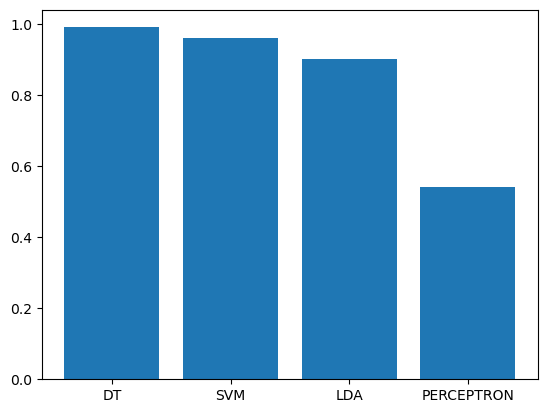

In [15]:
# model vs accuracy
models = ['DT', 'SVM', 'LDA', 'PERCEPTRON']
accuracies = [0.99, 0.96, 0.90, 0.54]

# Plot the bar graph
plt.bar(models, accuracies)

# Set labels and title


# Show the plot
plt.show()

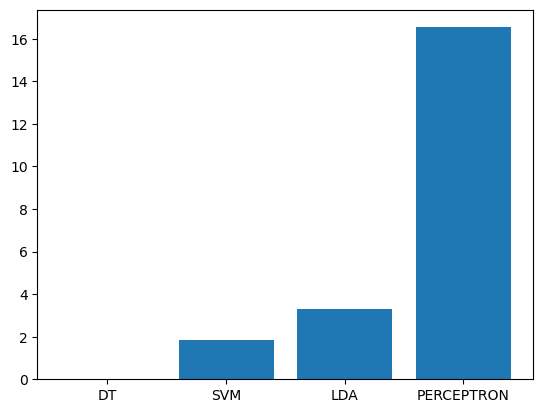

In [16]:
# model vs log loss
models = ['DT', 'SVM', 'LDA', 'PERCEPTRON']
log_loss = [0.0024, 1.83, 3.32, 16.54]

# Plot the bar graph
plt.bar(models, log_loss)

# Set labels and title

# Show the plot
plt.show()

from sklearn.model_selection import validation_curve, train_test_split

param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(
    rg, x_train, y_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Decision Tree Validation Curve")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color="blue")

plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker='o')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color="green")

plt.xticks(param_range)
plt.legend(loc="best")
plt.show()

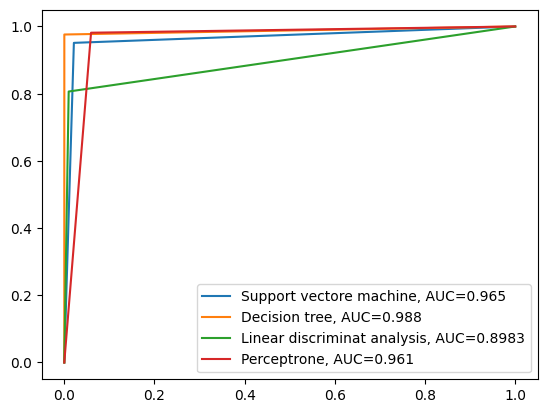

In [27]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_svm)
auc = round(metrics.roc_auc_score(y_test, y_pred_svm), 4)
plt.plot(fpr,tpr,label="Support vectore machine, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dt)
auc = round(metrics.roc_auc_score(y_test, y_pred_dt), 4)
plt.plot(fpr,tpr,label="Decision tree, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lda)
auc = round(metrics.roc_auc_score(y_test, y_pred_lda), 4)
plt.plot(fpr,tpr,label="Linear discriminat analysis, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_pr)
auc = round(metrics.roc_auc_score(y_test, y_pred_pr), 4)
plt.plot(fpr,tpr,label="Perceptrone, AUC="+str(auc))

plt.legend()